In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.nn import functional as F

In [27]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [28]:
#Linear Neural Network
class LinearNet(nn.Module):
    def __init__(self,num_classes=10):
        super(LinearNet, self).__init__()
        self.Layer1=nn.Linear(784,128)
        self.Layer2=nn.Linear(128,64)
        self.Layer3=nn.Linear(64,10)
    
    def forward(self,x):
        x=x.view(-1,784)
        x=F.relu(self.Layer1(x))
        x=F.relu(self.Layer2(x))
        x=self.Layer3(x)
        return x

In [29]:
#Hyperparameters
learning_rate=0.001
batch_size=64
num_epochs=100

In [30]:
#Dataset
train_dataset=datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

train_loader=DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [31]:
model=LinearNet().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

total_step=len(train_loader)

In [32]:
costs=[]
accuracy=[]

In [33]:
for epoch in range(num_epochs):
    for i,(data,targets) in enumerate(train_loader,0):

        data,targets=data.to(device),targets.to(device)
        
        #Forward propagation
        outputs=model(data)
        loss=criterion(outputs,targets)
        costs.append(loss.item())

        #Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Training accuracy
        _,predicted=torch.max(outputs.data,1)
        true=(predicted==targets).sum().item()
        accuracy.append(true/targets.size(0))

    print('Epoch: {}/{}, Loss: {:.4f}'
    .format(epoch+1,num_epochs,loss.item()))

Epoch: 1/100, Loss: 0.1486
Epoch: 2/100, Loss: 0.0641
Epoch: 3/100, Loss: 0.1254
Epoch: 4/100, Loss: 0.0147
Epoch: 5/100, Loss: 0.0062
Epoch: 6/100, Loss: 0.0177
Epoch: 7/100, Loss: 0.0025
Epoch: 8/100, Loss: 0.1078
Epoch: 9/100, Loss: 0.0176
Epoch: 10/100, Loss: 0.0218
Epoch: 11/100, Loss: 0.0571
Epoch: 12/100, Loss: 0.0278
Epoch: 13/100, Loss: 0.0011
Epoch: 14/100, Loss: 0.1407
Epoch: 15/100, Loss: 0.0081
Epoch: 16/100, Loss: 0.0210
Epoch: 17/100, Loss: 0.0058
Epoch: 18/100, Loss: 0.0000
Epoch: 19/100, Loss: 0.0007
Epoch: 20/100, Loss: 0.0309
Epoch: 21/100, Loss: 0.0005
Epoch: 22/100, Loss: 0.0014
Epoch: 23/100, Loss: 0.0060
Epoch: 24/100, Loss: 0.0003
Epoch: 25/100, Loss: 0.0017
Epoch: 26/100, Loss: 0.0001
Epoch: 27/100, Loss: 0.0000
Epoch: 28/100, Loss: 0.0183
Epoch: 29/100, Loss: 0.0087
Epoch: 30/100, Loss: 0.0001
Epoch: 31/100, Loss: 0.0000
Epoch: 32/100, Loss: 0.0002
Epoch: 33/100, Loss: 0.0010
Epoch: 34/100, Loss: 0.0000
Epoch: 35/100, Loss: 0.0389
Epoch: 36/100, Loss: 0.0000
E

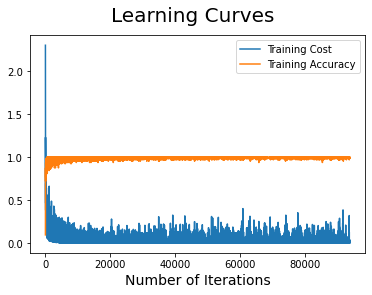

In [34]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(accuracy, label = 'Training Accuracy')
plt.legend()
plt.show()

In [35]:
def check_accuracy(loader,model):

    num_correct=0
    num_samples=0
    model.eval()

    with torch.no_grad():
        for x,y in loader:
            x,y=x.to(device),y.to(device)
            scores=model(x)

            _,predictions=scores.max(1)
            num_correct+=(predictions==y).sum()
            num_samples+=predictions.size(0)

    model.train()
    return num_correct.double()/num_samples*100

In [36]:
training_accuracy = check_accuracy(train_loader, model)
testing_accuracy = check_accuracy(test_loader, model)
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 99.93666666666667
Testing Accuracy: 97.98


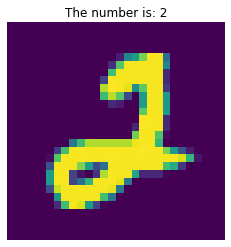

In [37]:
index=random.randint(0,len(test_dataset))

with torch.no_grad():
    data=test_dataset[index][0].view(1,784)
    data=data.to(device)
    output=model(data)
    _,predicted=torch.max(output.data,1)

    plt.imshow(test_dataset[index][0].view(28,28))
    plt.title('The number is: {}'.format(predicted.item()))
    plt.axis('off')
    plt.show()